In [ ]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

"""
# Different Data Sets that may also be educational for learning clustering: 
# https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling
"""
# 1. Data Import
Customer = pd.read_csv('/Users/alex/Desktop/CustomerClustering.csv')
Customer.head(n=5)
print(Customer.shape)  # 5 variables and 60 rows
# Next, we're going to standardize our columns to fit our distance method
Customer.iloc[:, 1] = (Customer.iloc[:, 1] - Customer.iloc[:, 1].mean()) / Customer.iloc[:, 1].std()
Customer.iloc[:, 2] = (Customer.iloc[:, 2] - Customer.iloc[:, 2].mean()) / Customer.iloc[:, 2].std()
Customer.iloc[:, 4] = (Customer.iloc[:, 4] - Customer.iloc[:, 4].mean()) / Customer.iloc[:, 4].std()
v1 = Customer['Visit.Time'].values  # variable 1
v2 = Customer['Average.Expense'].values  # variable 2
v3 = Customer['Age'].values  # variable 3
X = np.array(list(zip(v1, v2, v3)))
X.max(axis=0)
X.min(axis=0)

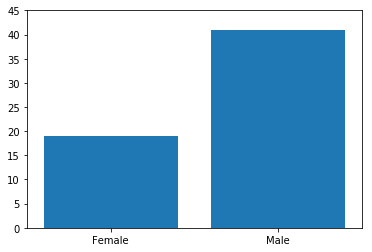

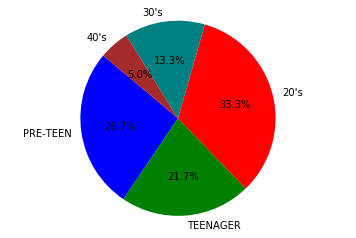

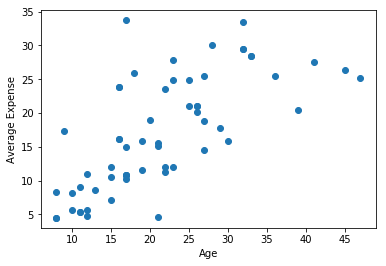

In [31]:
# 2. Data Visualization
# Sex Distribution
sex = [1, 0]
plt.bar((1, 0), pd.value_counts(Customer['Sex']))
plt.xticks(sex, ['Male', 'Female'])
plt.axis([-0.5, 1.5, 0, 45])
plt.show()

# Age Distribution
Customer['Age'].sort_values()
TF1 = Customer['Age'] < 16
Interval1 = Customer['Age'][TF1].count()
TF2 = (Customer['Age'] >= 16) & (Customer['Age'] < 20)
Interval2 = Customer['Age'][TF2].count()
TF3 = (Customer['Age'] >= 20) & (Customer['Age'] < 30)
Interval3 = Customer['Age'][TF3].count()
TF4 = (Customer['Age'] >= 30) & (Customer['Age'] < 40)
Interval4 = Customer['Age'][TF4].count()
TF5 = Customer['Age'] >= 40
Interval5 = Customer['Age'][TF5].count()

labels = ['PRE-TEEN', 'TEENAGER', "20's", "30's", "40's"]
sizes = [Interval1, Interval2, Interval3, Interval4, Interval5]
colors = ['blue', 'green', 'red', 'teal', 'brown']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

# Age vs. Average.Expense Scatter Plot
Age = Customer['Age'].values
AverageExpense = Customer['Average.Expense'].values
plt.scatter(Age, AverageExpense)
plt.xlabel('Age')
plt.ylabel('Average Expense')
plt.show()


In [32]:
# 3. Define Distance: Weight Distance
"""
Here my thoughts about this distance is that we can define the weights based on the variables
that we think are much more important.

Perhaps we can let the sum of weights equal to 0?
Or we can let the weights be integers?

"""


def weight_distance(l, m, ax, w1=0.5, w2=0.3, w3=0.2):
    if ax == 1:
        distance = np.zeros((3, 1))
        for r in range(0, 3):
            distance[r] = w1 * np.abs(l[0] - m[r][0]) + w2 * np.abs(l[1] - m[r][1]) + w3 * np.abs(l[2] - m[r][2])
        return distance
    elif ax == 0:
        cost = w1 * np.abs(l[0] - m[0]) + w2 * np.abs(l[1] - m[1]) + w3 * np.abs(l[2] - m[2])
        return cost
    else:
        error_distance = np.zeros((3, 1))
        error_distance[0] = w1 * np.abs(l[0][0] - m[0][0]) + w2 * np.abs(l[0][1] - m[0][1]) + w3 * np.abs(l[0][2] - m[0][2])
        error_distance[1] = w1 * np.abs(l[1][0] - m[1][0]) + w2 * np.abs(l[1][1] - m[1][1]) + w3 * np.abs(l[1][2] - m[1][2])
        error_distance[2] = w1 * np.abs(l[2][0] - m[2][0]) + w2 * np.abs(l[2][1] - m[2][1]) + w3 * np.abs(l[2][2] - m[2][2])
        return error_distance.sum()


In [33]:
# 4. Clustering Preparation
# Clustering Labels
clusters = np.zeros(len(X))

# 5. Elbow Method
"""
Warning:
I still haven't define the distance perfectly to fit every situations.
When we've got different numbers of centroids, the distance function needs to be revised.
"""

# 6. Run KMeans and doing random initialization (k = 3)
# Create an array that stores the cost function under different centroids
cost_function = np.zeros([100, 1])
# Loop will run till the error becomes zero
for a in range(100):
    np.random.seed(a)
    k = 3
    C_x = np.random.choice(v1, size=k)
    # Y coordinates of random centroids
    C_y = np.random.choice(v2, size=k)
    # Z coordinates of random centroids
    C_z = np.random.choice(v3, size=k)
    C = np.array(list(zip(C_x, C_y, C_z)), dtype=np.float32)
    error = 1  # if error = 0, then the while loop won't execute
    while error >= 0.01:  # if error = 0, means that all the centroids are the same as the previous
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = weight_distance(X[i], C, 1)
            cluster = np.argmin(distances)  # There is an explanation of how it works
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = copy.deepcopy(C)  # There is an explanation of the meaning of deepcopy
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = weight_distance(C, C_old, 2)
    for b in range(len(X)):
        if clusters[b] == 0:
            c = [weight_distance(X[b], C[0], 0)]
        elif clusters[b] == 1:
            c = [weight_distance(X[b], C[1], 0)]
        else:
            c = [weight_distance(X[b], C[2], 0)]
        cost_function[a] += c


/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [34]:
np.random.seed(np.argmin(cost_function))  # Use the centroids with the lowest cost function to run K-Means again.
k = 3
C_x = np.random.choice(v1, size=k)
C_y = np.random.choice(v2, size=k)
C_z = np.random.choice(v3, size=k)
C = np.array(list(zip(C_x, C_y, C_z)), dtype=np.float32)
error = 1  # if error = 0, means that all the centroids are the same as the previous
while error >= 0.01:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = weight_distance(X[i], C, 1)
        cluster = np.argmin(distances)  # There is an explanation of how it works
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = copy.deepcopy(C)  # There is an explanation of the meaning of deepcopy
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = weight_distance(C, C_old, 2)

In [35]:
Customer = pd.read_csv('/Users/alex/Desktop/CustomerClustering.csv')
Type0 = Customer[clusters == 0].drop('ID', 1)  # Here we delete column 'ID' since it can't offer any information
Type1 = Customer[clusters == 1].drop('ID', 1)
Type2 = Customer[clusters == 2].drop('ID', 1)
print('Type0 length: %d; Type1 length: %d; Type2 length: %d' % ((len(Type0)), (len(Type1)), (len(Type2))))

Type0 length: 24; Type1 length: 21; Type2 length: 15


In [36]:
Type0.mean()  
pd.value_counts(Type0['Age'], ascending=False)
pd.pivot_table(Type0, index=['Sex'], values=['Visit.Time', 'Average.Expense', 'Age', 'Sex'],
               aggfunc={'Visit.Time': np.mean, 'Average.Expense': np.mean,
                        'Age': np.mean, 'Sex': pd.value_counts})


,Age,Average.Expense,Sex,Visit.Time
Sex,,,,
0,26.6250,25.5875,8,14.375
1,31.1875,25.3625,16,12.250


In [37]:
Type1.mean()  
pd.value_counts(Type1['Age'], ascending=False)
pd.pivot_table(Type1, index=['Sex'], values=['Visit.Time', 'Average.Expense', 'Age', 'Sex'],
               aggfunc={'Visit.Time': np.mean, 'Average.Expense': np.mean,
                        'Age': np.mean, 'Sex': pd.value_counts})

,Age,Average.Expense,Sex,Visit.Time
Sex,,,,
0,21.500000,15.133333,6,6.166667
1,18.666667,13.653333,15,7.066667


In [38]:
Type2.mean()  
pd.value_counts(Type2['Age'], ascending=False)
pd.pivot_table(Type2, index=['Sex'], values=['Visit.Time', 'Average.Expense', 'Age', 'Sex'],
               aggfunc={'Visit.Time': np.mean, 'Average.Expense': np.mean,
                        'Age': np.mean, 'Sex': pd.value_counts})

,Age,Average.Expense,Sex,Visit.Time
Sex,,,,
0,11.6,9.80,5,3.4
1,10.7,6.84,10,3.3


In [29]:
Customer['Cluster'] = clusters
Customer.sort_values(by=['Visit.Time', 'Cluster'], ascending=True)

,ID,Visit.Time,Average.Expense,Sex,Age,Cluster
29,30,1,4.5,1,8,0.0
34,35,1,4.5,1,8,0.0
0,1,3,5.7,0,10,0.0
5,6,3,12.0,0,15,0.0
9,10,3,5.3,0,11,0.0
22,23,3,5.6,1,12,0.0
25,26,3,4.8,1,12,0.0
40,41,3,8.3,1,8,0.0
50,51,3,5.3,1,11,0.0
55,56,3,7.2,1,15,0.0


In [30]:
Customer.sort_values(by=['Cluster', 'Visit.Time', 'Average.Expense'], ascending=[True, True, False])

,ID,Visit.Time,Average.Expense,Sex,Age,Cluster
29,30,1,4.5,1,8,0.0
34,35,1,4.5,1,8,0.0
5,6,3,12.0,0,15,0.0
40,41,3,8.3,1,8,0.0
55,56,3,7.2,1,15,0.0
0,1,3,5.7,0,10,0.0
22,23,3,5.6,1,12,0.0
9,10,3,5.3,0,11,0.0
50,51,3,5.3,1,11,0.0
25,26,3,4.8,1,12,0.0
